In [3]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 결측치 시각화를 위한 라이브러리
import missingno

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

In [4]:
train_df = pd.read_csv('data/train.csv')
train_df

,ID,_2순위업종_이용금액,최대이용금액_일시불_R12M,납부_기타이용금액,쇼핑_편의점_이용금액,_2순위교통업종_이용금액,최대이용금액_CA_R12M,교통_정비이용금액,기준년월,할부금액_무이자_3M_R12M,이용개월수_온라인_R6M,연속유실적개월수_기본_24M_카드,이용금액대,청구금액_R6M,평잔_일시불_해외_6M,잔액_일시불_B2M,평잔_일시불_6M,이용카드수_신용체크,_1순위카드이용건수,Segment
0,TRAIN_000000,1408,4906,44,0,105,11710,0,201807,1314,1,13,01.100만원+,88693,0,1083,2440,1,26,D
1,TRAIN_000000,1523,5350,40,0,0,11738,0,201808,1124,1,13,01.100만원+,119419,0,736,2697,1,23,D
2,TRAIN_000000,1462,6009,44,0,0,11747,0,201809,989,1,17,01.100만원+,132269,0,997,2735,1,27,D
3,TRAIN_000000,1367,5901,48,0,0,11942,0,201810,954,1,17,01.100만원+,92304,0,697,2562,1,26,D
4,TRAIN_000000,1356,6257,44,0,0,12116,0,201811,976,0,17,01.100만원+,97254,0,607,2431,1,26,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,TRAIN_399999,2168,5760,0,0,0,0,0,201808,18391,0,2,03.30만원+,28912,0,0,1600,2,-2,E
2399996,TRAIN_399999,2687,6233,0,0,0,0,0,201809,18477,0,5,02.50만원+,42577,0,998,1742,2,-1,E
2399997,TRAIN_399999,2447,6091,0,0,0,0,0,201810,18640,0,5,03.30만원+,23976,0,814,1410,2,-2,E
2399998,TRAIN_399999,2647,4624,0,0,0,0,0,201811,15516,0,5,04.10만원+,26946,0,1485,993,2,-2,E


In [3]:
# 데이터 프레임 정보 확인
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 20 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   ID                  object
 1   _2순위업종_이용금액         int64 
 2   최대이용금액_일시불_R12M     int64 
 3   납부_기타이용금액           int64 
 4   쇼핑_편의점_이용금액         int64 
 5   _2순위교통업종_이용금액       int64 
 6   최대이용금액_CA_R12M      int64 
 7   교통_정비이용금액           int64 
 8   기준년월                int64 
 9   할부금액_무이자_3M_R12M    int64 
 10  이용개월수_온라인_R6M       int64 
 11  연속유실적개월수_기본_24M_카드  int64 
 12  이용금액대               object
 13  청구금액_R6M            int64 
 14  평잔_일시불_해외_6M        int64 
 15  잔액_일시불_B2M          int64 
 16  평잔_일시불_6M           int64 
 17  이용카드수_신용체크          int64 
 18  _1순위카드이용건수          int64 
 19  Segment             object
dtypes: int64(17), object(3)
memory usage: 366.2+ MB


In [4]:
# 결측치 확인
train_df.isna().sum()

ID                    0
_2순위업종_이용금액           0
최대이용금액_일시불_R12M       0
납부_기타이용금액             0
쇼핑_편의점_이용금액           0
_2순위교통업종_이용금액         0
최대이용금액_CA_R12M        0
교통_정비이용금액             0
기준년월                  0
할부금액_무이자_3M_R12M      0
이용개월수_온라인_R6M         0
연속유실적개월수_기본_24M_카드    0
이용금액대                 0
청구금액_R6M              0
평잔_일시불_해외_6M          0
잔액_일시불_B2M            0
평잔_일시불_6M             0
이용카드수_신용체크            0
_1순위카드이용건수            0
Segment               0
dtype: int64

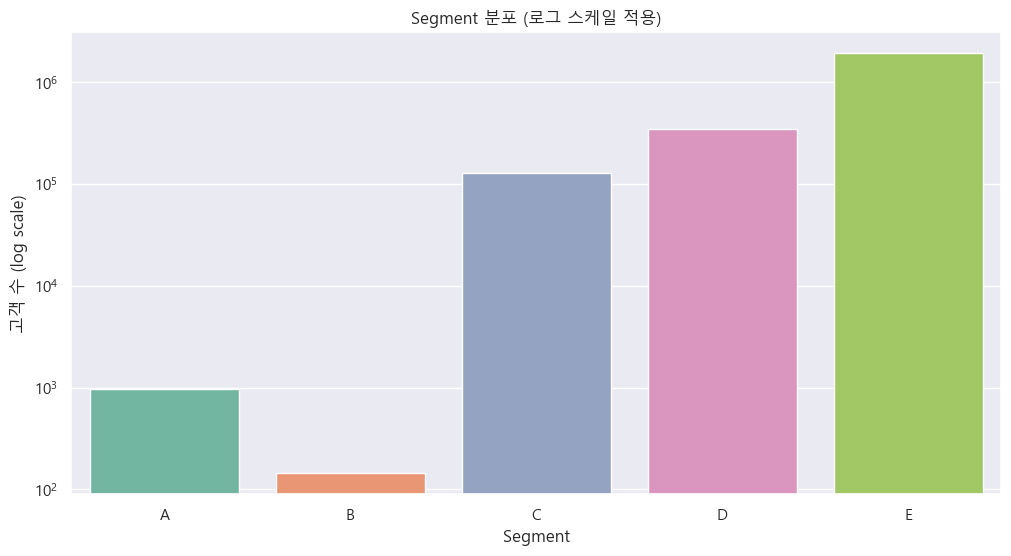

In [5]:
# 그래프 그리기
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=train_df,
    x='Segment',
    order=sorted(train_df['Segment'].unique()),
    palette='Set2'  # 다양한 색상 적용
)

# 로그 스케일 적용 (y축이 너무 치우친 경우)
ax.set_yscale('log')
plt.title('Segment 분포 (로그 스케일 적용)')
plt.xlabel('Segment')
plt.ylabel('고객 수 (log scale)')
plt.show()

In [6]:
# 비율
display(train_df['Segment'].value_counts())

Segment
E    1922052
D     349242
C     127590
A        972
B        144
Name: count, dtype: int64

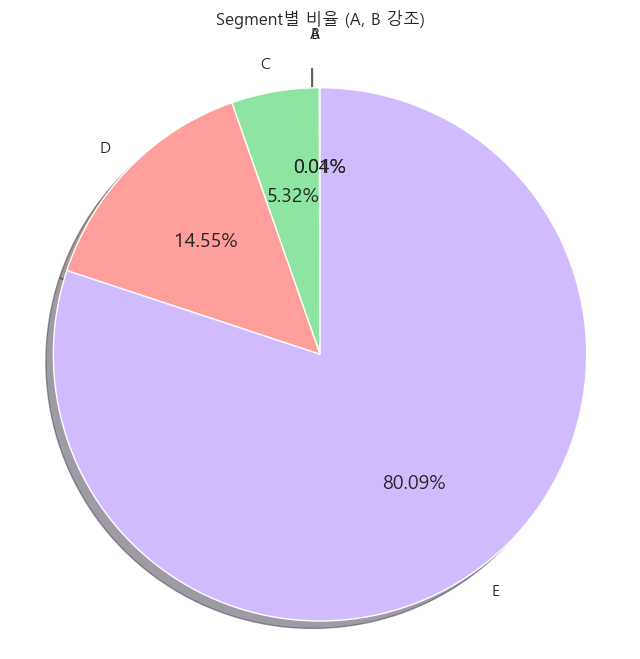

In [7]:
import matplotlib.pyplot as plt

segment_counts = train_df['Segment'].value_counts().sort_index()
labels = segment_counts.index
sizes = segment_counts.values

# A, B 강조를 위해 explode 설정
explode = [0.1 if label in ['A', 'B'] else 0 for label in labels]

colors = sns.color_palette('pastel')[0:len(labels)]

plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%.2f%%',
    colors=colors,
    startangle=90,
    shadow=True,
    explode=explode,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Segment별 비율 (A, B 강조)')
plt.axis('equal')
plt.show()


- E 비율이 80% 이상이다
- E > D > C > A > B 순서이다

### 청구금액_R6M
- 청구금액 (최근6개월간)	int64	/ 88693, 16861, 165221, 127371, 155	수치형

In [10]:
train_df['청구금액_R6M'].value_counts()

청구금액_R6M
0         353022
81           653
76           646
84           629
93           626
           ...  
197844         1
141237         1
222241         1
154641         1
221453         1
Name: count, Length: 205357, dtype: int64

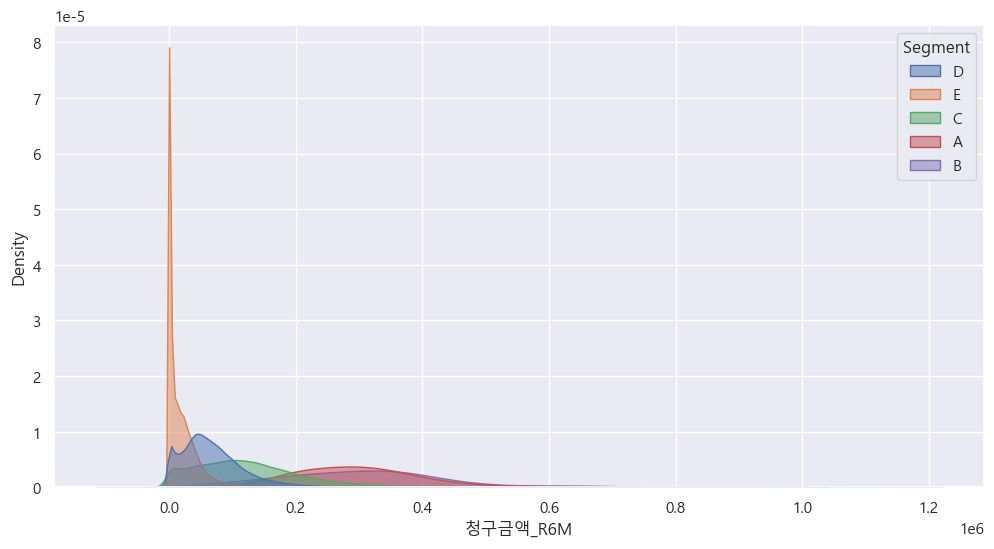

In [11]:
sns.kdeplot(
    data=train_df,
    x='청구금액_R6M',
    hue='Segment',
    fill=True,
    common_norm=False,
    alpha=0.5
)
plt.show()


- 대부분의 Segment, 특히 E는 거의 0에 몰림 → 매우 낮은 청구금액

- Segment A, B는 다른 그룹보다 전반적으로 높은 청구금액 분포

- Segment C, D는 중간 정도, 하지만 분포가 뭉쳐 있음 (상대적으로 좁은 범위)

In [12]:
subset = train_df[train_df['기준년월'] == 201811]

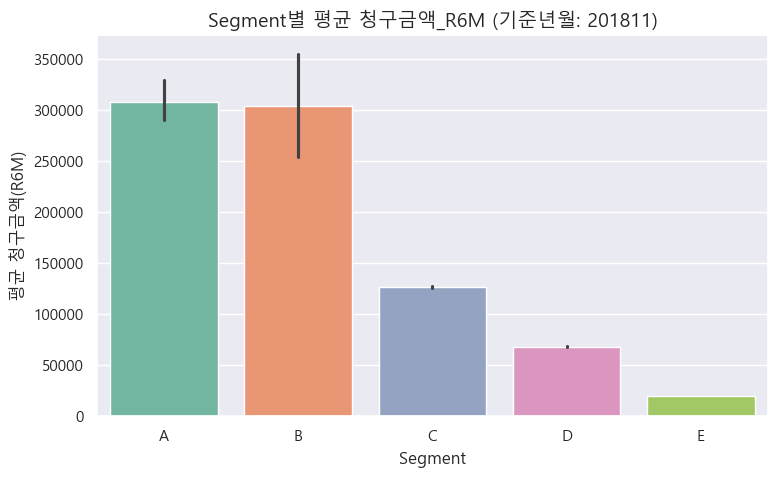

In [88]:
# 정렬 기준: 평균 청구금액 기준 내림차순
segment_order = (
    subset.groupby('Segment')['청구금액_R6M']
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

# 색상 팔레트
palette = sns.color_palette("Set2")

# 시각화
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=subset,
    x='Segment',
    y='청구금액_R6M',
    estimator='mean',
    order=segment_order,  # ✅ 정렬 반영
    palette=palette,
)

# 제목 및 축 설정
ax.set_title('Segment별 평균 청구금액_R6M (기준년월: 201811)', fontsize=14)
ax.set_xlabel('Segment', fontsize=12)
ax.set_ylabel('평균 청구금액(R6M)', fontsize=12)

plt.tight_layout()
plt.show()


- 평균 청구금액은 A > B > C > D > E 순

- A, B Segment의 평균은 약 30만 원대,
- C는 약 12~13만 원,
- D는 7만 원대,
- E는 1~2만 원대 수준

- A, B는 프리미엄 고객군일 가능성이 높음

- E는 저활동 또는 휴면 고객군

In [103]:
train_df.groupby('Segment')['청구금액_R6M'].mean()

Segment
A    316939.458848
B    316174.256944
C    128408.240129
D     69963.942264
E     19778.687382
Name: 청구금액_R6M, dtype: float64

In [86]:
subset.groupby('Segment')['청구금액_R6M'].max()

Segment
A    994003
B    687595
C    925741
D    738874
E    667553
Name: 청구금액_R6M, dtype: int64

| 항목             | 인사이트                                             |
| -------------- | ------------------------------------------------ |
| **소비 격차**      | A/B와 E 사이에 **청구금액 격차가 매우 큼** → 세그먼트 간 소비력 차이 분명함 |
| **세그먼트 정의 근거** | Segment는 실제로 **소비 수준**을 잘 반영하고 있음                |
| **마케팅 관점**     | A/B 타겟: **고소득 프리미엄 전략**, E 타겟: **재활성화 캠페인 필요**   |
| **예측 모델링 관점**  | `청구금액_R6M`은 Segment 예측에서 **중요한 Feature**         |


### 평잔_일시불_해외_6M

- 평균 잔액 일시불 해외 (최근6개월)	int64	0, 559, 402, 435, 571	수치형

In [16]:
train_df['평잔_일시불_해외_6M'].value_counts()

평잔_일시불_해외_6M
0       2097312
254        1306
243        1297
253        1292
244        1289
         ...   
1858          1
1578          1
1919          1
1612          1
1856          1
Name: count, Length: 1719, dtype: int64

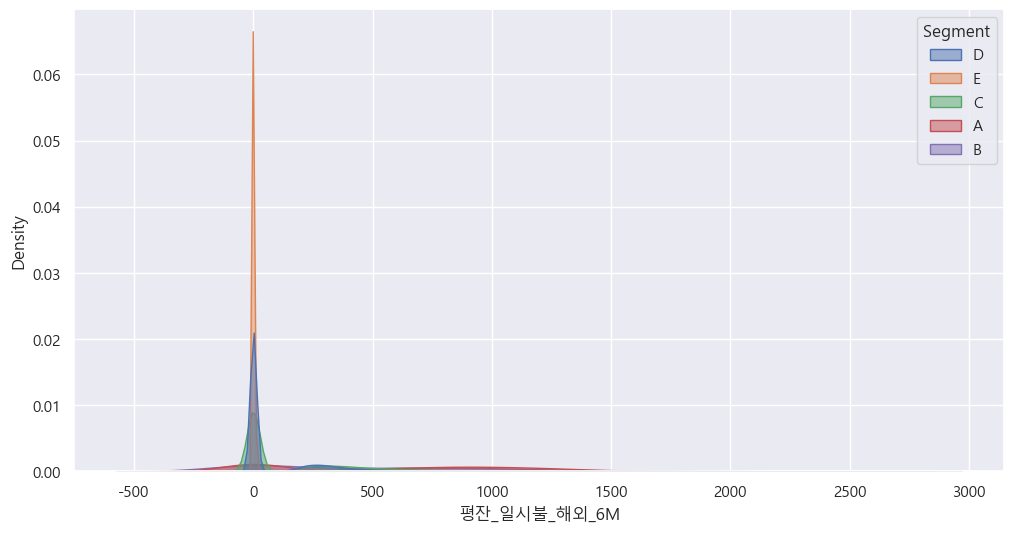

In [17]:
sns.kdeplot(
    data=train_df,
    x='평잔_일시불_해외_6M',
    hue='Segment',
    fill=True,
    common_norm=False,
    alpha=0.5
)
plt.show()

- 대부분의 Segment에서 값이 0에 몰려 있음. 특히 Segment E는 거의 전부가 0

- Segment A, B는 분포가 넓게 퍼져 있고 오른쪽으로 긴 꼬리 (소수의 고액 사용자 존재)

- Segment A/B는 해외 일시불을 많이 사용하는 고객군

- Segment E는 해외 사용이 거의 없는 비활성 또는 저소득 고객군

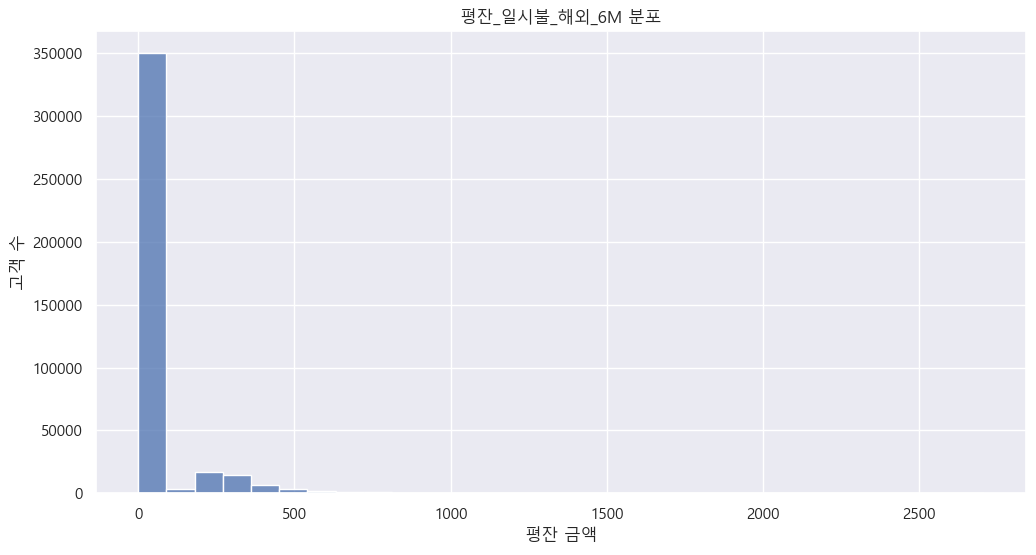

In [18]:
sns.histplot(subset['평잔_일시불_해외_6M'], bins=30)
plt.title('평잔_일시불_해외_6M 분포')
plt.xlabel('평잔 금액')
plt.ylabel('고객 수')
plt.show()

- 해외 일시불은 대다수 고객이 사용하지 않거나 매우 적은 금액만 사용
- 500원 이상 잔액을 가진 고객은 매우 소수
- 이 변수는 “사용자 vs 비사용자”를 구분하는 binary 특성으로 활용 가능

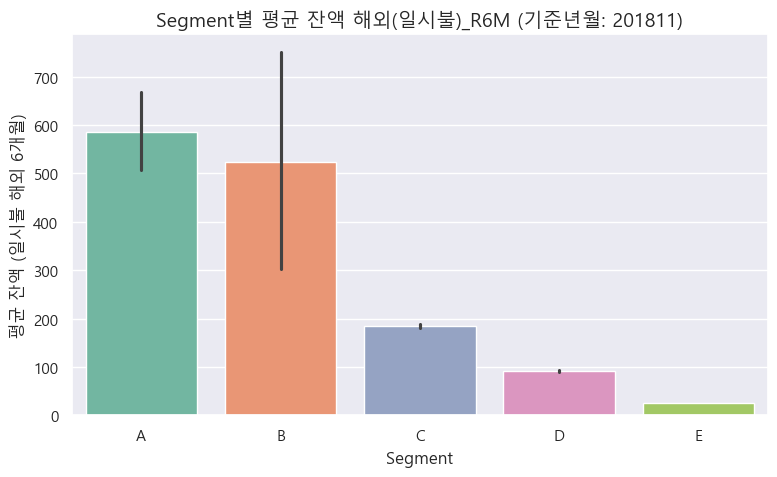

In [90]:
# Segment별 평균 '평잔_일시불_해외_6M' 기준으로 정렬
segment_order = (
    subset.groupby('Segment')['평잔_일시불_해외_6M']
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

# 색상 설정
palette = sns.color_palette("Set2")

# 시각화
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=subset,
    x='Segment',
    y='평잔_일시불_해외_6M',
    order=segment_order,  # ✅ 정렬 적용
    palette=palette,
)

# 제목 및 축 설정
ax.set_title('Segment별 평균 잔액 해외(일시불)_R6M (기준년월: 201811)', fontsize=14)
ax.set_xlabel('Segment', fontsize=12)
ax.set_ylabel('평균 잔액 (일시불 해외 6개월)', fontsize=12)

plt.tight_layout()
plt.show()

- 평균적으로 Segment A와 B의 해외 일시불 평균 잔액이 가장 높음

- A: 약 600 - 700원 / B: 약 500 - 600원 / C는 중간 수준, D/E는 매우 낮음

- A/B 고객은 국제적 소비 성향 아주 약간

- E는 거의 사용하지 않음 → 기본 카드도 거의 안 쓰는 군

In [67]:
train_df.groupby('Segment')['평잔_일시불_해외_6M'].mean()

Segment
A    589.310700
B    500.520833
C    184.038796
D     92.872830
E     25.831954
Name: 평잔_일시불_해외_6M, dtype: float64

In [57]:
train_df[train_df['Segment'] == 'A']['평잔_일시불_해외_6M'].max()

2211

| 항목         | 인사이트 요약                                          |
| ---------- | ------------------------------------------------ |
| 전체 고객      | 대부분 해외 일시불 사용 안 함 (`0원`)                         |
| Segment 차이 | A/B는 명확히 높은 평균 잔액 → **프리미엄 고객**                  |
| 마케팅 활용     | A/B 타겟: 해외 제휴 이벤트, 프리미엄 서비스 홍보<br>E 타겟: 재활성화 캠페인 |
| 모델링 관점     | `평잔_일시불_해외_6M`은 Segment 분류에 효과적인 **구분자 Feature** |


### 평잔_일시불_6M

- 평균 잔액 일시불 (최근6개월)	int64	2440, 2677, 9118, 884, 21	수치형

In [22]:
train_df['평잔_일시불_6M'].value_counts()

평잔_일시불_6M
0        441363
6          4724
7          4361
5          4092
8          3677
          ...  
72800         1
58726         1
59001         1
65389         1
26317         1
Name: count, Length: 50481, dtype: int64

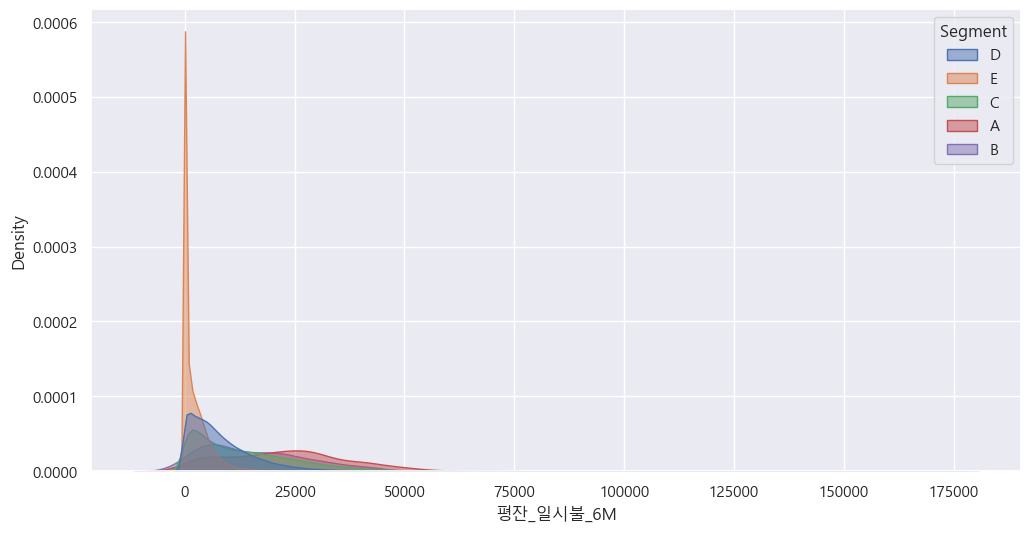

In [96]:
sns.kdeplot(
    data=train_df,
    x='평잔_일시불_6M',
    hue='Segment',
    fill=True,
    common_norm=False,
    alpha=0.5
)
plt.show()

- 대부분의 Segment는 낮은 금액대에 몰려 있으나, A/B Segment는 넓고 오른쪽으로 긴 분포
- E 는 극단적으로 0에 몰려 있음
- A, B 는 일시불 이용금액이 크고 다양, E 는 거의 사용하지 않는 군

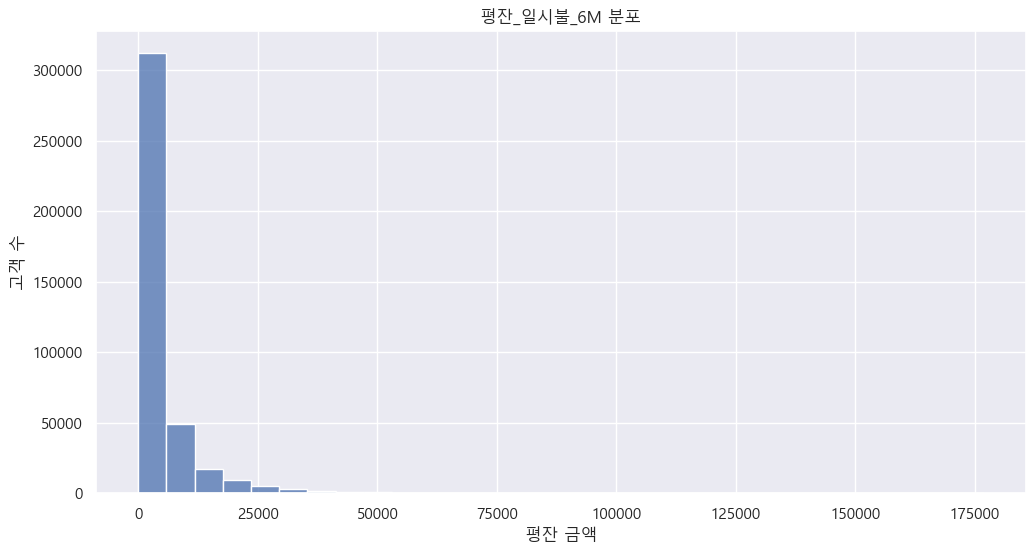

In [23]:
sns.histplot(subset['평잔_일시불_6M'], bins=30)
plt.title('평잔_일시불_6M 분포')
plt.xlabel('평잔 금액')
plt.ylabel('고객 수')
plt.show()

- 전체 고객 중 평잔 0~1만 원 미만에 대다수 집중
- 25,000원 이상 되는 고객은 일부 고액 사용자
- 대다수 고객은 소액 일시불 사용자

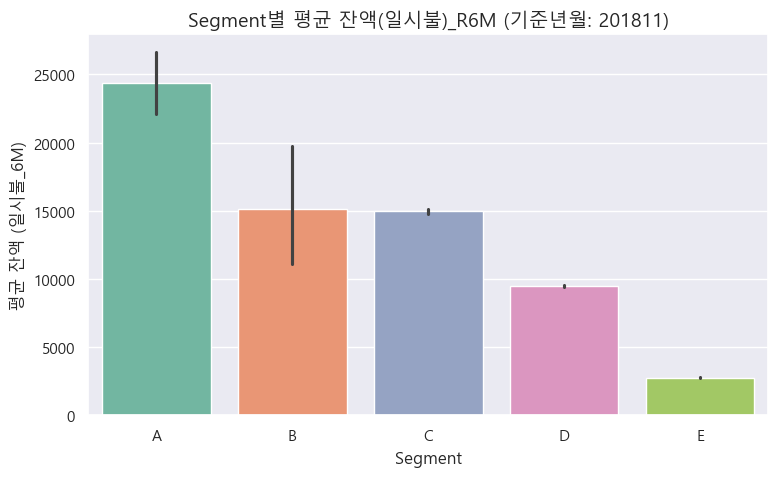

In [92]:
# Segment별 '평잔_일시불_6M' 평균 기준 내림차순 정렬
segment_order = (
    subset.groupby('Segment')['평잔_일시불_6M']
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

# 색상 설정
palette = sns.color_palette("Set2")  # 부드러운 파스텔 색상

# 시각화
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=subset,
    x='Segment',
    y='평잔_일시불_6M',
    order=segment_order,  # ✅ 정렬 적용
    palette=palette,
)

# 제목 및 축 설정
ax.set_title('Segment별 평균 잔액(일시불)_R6M (기준년월: 201811)', fontsize=14)
ax.set_xlabel('Segment', fontsize=12)
ax.set_ylabel('평균 잔액 (일시불_6M)', fontsize=12)

plt.tight_layout()
plt.show()

In [118]:
train_df.groupby('Segment')['평잔_일시불_6M'].mean()

Segment
A    23138.444444
B    16162.847222
C    14118.216788
D     9045.806925
E     2640.088545
Name: 평잔_일시불_6M, dtype: float64

- 평균 일시불 잔액:

- A Segment: 약 24,000원

- B Segment: 약 15,000원

- E Segment: 약 3,000원

- Segment별 차이가 매우 뚜렷하고, 오차 막대에서 A와 E의 격차가 확실함

-  Segment A/B는 고소득 또는 소비활성 고객,
- Segment E는 저활성 또는 휴면 고객

| 항목         | 인사이트 요약                                           |
| ---------- | ------------------------------------------------- |
| 전체 고객군     | 대부분의 고객은 일시불 평균 잔액이 매우 낮음 (소액 사용자 다수)             |
| Segment 차이 | A/B Segment는 확연히 높은 평균 잔액 보유                      |
| 마케팅 활용     | A/B는 고액 소비자 타겟 프로모션 대상<br>E는 혜택 제공 통한 재활성화 유도     |
| 모델링 측면     | `평잔_일시불_6M` 변수는 Segment 예측의 **핵심 Feature**로 활용 가능 |


### 잔액_일시불_B2M

- 잔액 일시불 (2개월전)	int64	1083, 1424, 6143, 708, 0	수치형

In [27]:
train_df['잔액_일시불_B2M'].value_counts()

잔액_일시불_B2M
0        690155
6          1419
7          1346
8          1324
9          1214
          ...  
40151         1
68127         1
38717         1
37516         1
31118         1
Name: count, Length: 51500, dtype: int64

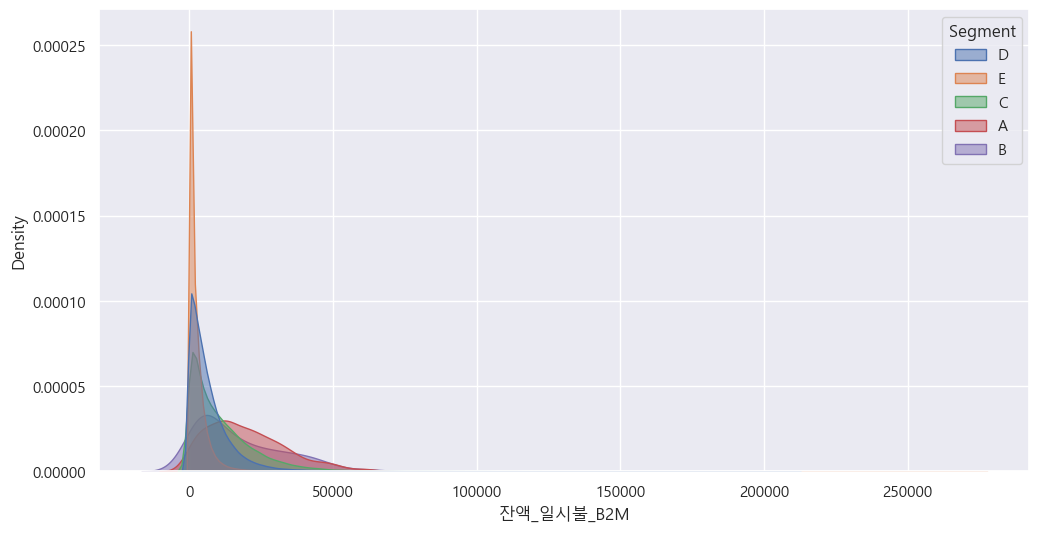

In [98]:
sns.kdeplot(
    data=train_df,
    x='잔액_일시불_B2M',
    hue='Segment',
    fill=True,
    common_norm=False,
    alpha=0.5
)
plt.show()

- E는 대부분 잔액이 거의 0원에 몰려 있음

- A는 분포가 넓게 퍼져 있으며, 잔액도 높음

- B, C, D는 중간 수준으로 보이며 B는 상대적으로 분산이 큼

- 프리미엄 세그먼트일수록 카드 사용 후 잔액이 클 가능성이 높음 → 소비 여력 or 고가 구매 경험 반영

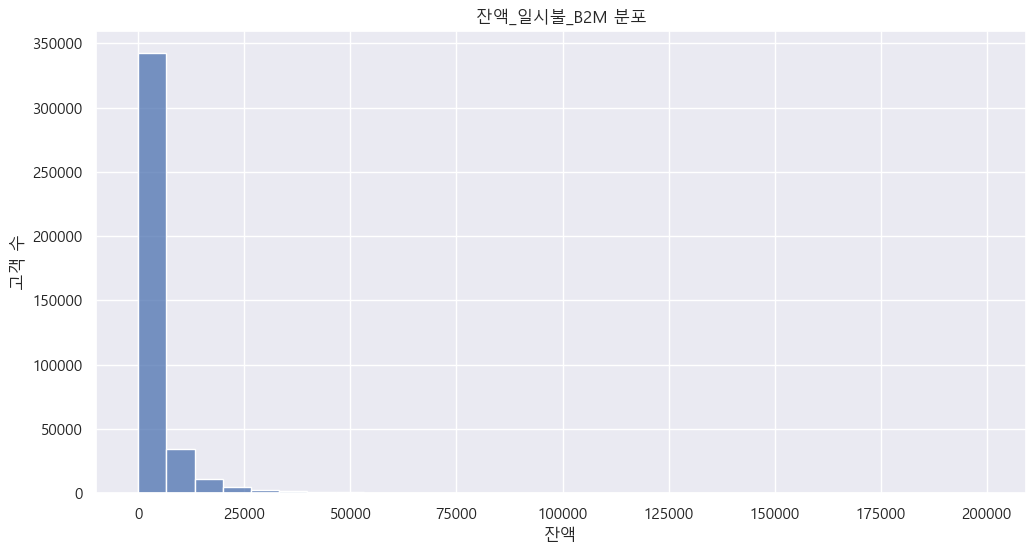

In [28]:
sns.histplot(subset['잔액_일시불_B2M'], bins=30)
plt.title('잔액_일시불_B2M 분포')
plt.xlabel('잔액')
plt.ylabel('고객 수')
plt.show()

- 대부분의 고객은 0~1만 원 이하 수준의 잔액을 가지고 있음

- 소수의 고객이 10만~20만 원 이상의 높은 잔액을 가지고 있음

- 전체적으로는 낮은 수준의 카드 일시불 잔액을 보이지만, 일부 고객은 상위소득층으로 추정 가능

In [138]:
train_df['평잔_일시불_6M'].max()

176861

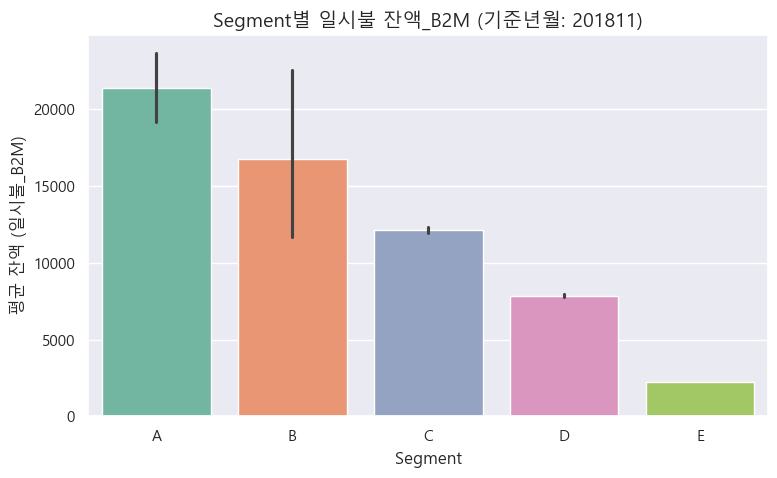

In [94]:
# Segment별 평균 잔액 정렬 (내림차순)
segment_order = (
    subset.groupby('Segment')['잔액_일시불_B2M']
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

# 부드러운 색상
palette = sns.color_palette("Set2")

# 시각화
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=subset,
    x='Segment',
    y='잔액_일시불_B2M',
    estimator='mean',
    order=segment_order,  # ✅ 정렬 적용
    palette=palette,
)

# 제목 및 축 설정
ax.set_title('Segment별 일시불 잔액_B2M (기준년월: 201811)', fontsize=14)
ax.set_xlabel('Segment', fontsize=12)
ax.set_ylabel('평균 잔액 (일시불_B2M)', fontsize=12)

plt.tight_layout()
plt.show()

In [122]:
train_df.groupby('Segment')['평잔_일시불_6M'].mean()

Segment
A    23138.444444
B    16162.847222
C    14118.216788
D     9045.806925
E     2640.088545
Name: 평잔_일시불_6M, dtype: float64

- A가 평균 약 21,000원으로 가장 높음 / B는 약 16,000원 / C는 12,000원 / D는 8,000원대 / E는 2,000원대
- Segment 순서가 곧 소비·사용력의 계층 구분을 의미
- A/B: 고가 소비자, E: 비활성 or 저소득층

| 항목           | 인사이트                                                    |
| ------------ | ------------------------------------------------------- |
| **고객 활동성**   | 잔액이 클수록 카드 사용 빈도나 금액이 높고, **프리미엄 고객군으로 추정**됨            |
| **세그먼트 차별성** | A, B Segment는 확실히 높은 잔액을 보이며, **명확한 소비 성향의 구분** 가능      |
| **모델링 활용성**  | `잔액_일시불_B2M` 변수는 Segment 예측에 있어 **강력한 Feature 후보**      |
| **마케팅 전략**   | Segment E 대상 재활성화 캠페인, Segment A/B 대상 **VIP 서비스 강화** 필요 |


In [7]:
# 0원인 고객 수 계산
zero_balance = train_df[train_df['평잔_일시불_6M'] == 0]

# Segment별 0원 비율
zero_ratio = zero_balance['Segment'].value_counts(normalize=True) * 100
print(zero_ratio.sort_values(ascending=False))


Segment
E    96.636329
D     2.630941
C     0.732730
Name: proportion, dtype: float64


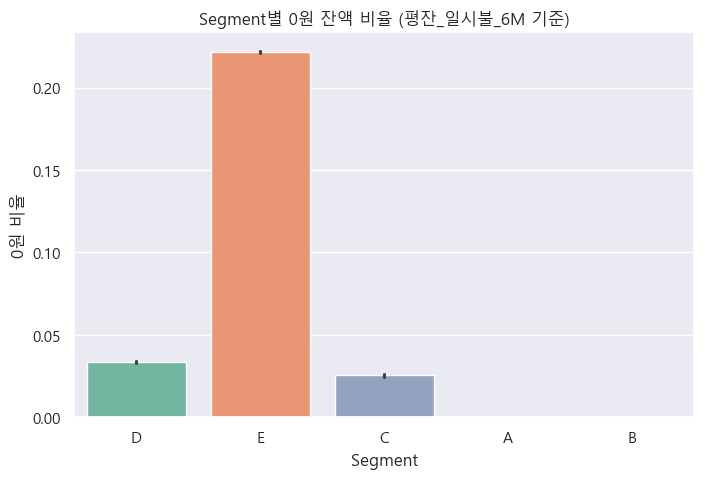

In [15]:
train_df['잔액_0원'] = (train_df['평잔_일시불_6M'] == 0).astype(int)

plt.figure(figsize=(8,5))
sns.barplot(
    data=train_df,
    x='Segment',
    y='잔액_0원',
    estimator='mean',
    palette='Set2'
)
plt.title('Segment별 0원 잔액 비율 (평잔_일시불_6M 기준)')
plt.ylabel('0원 비율')
plt.show()


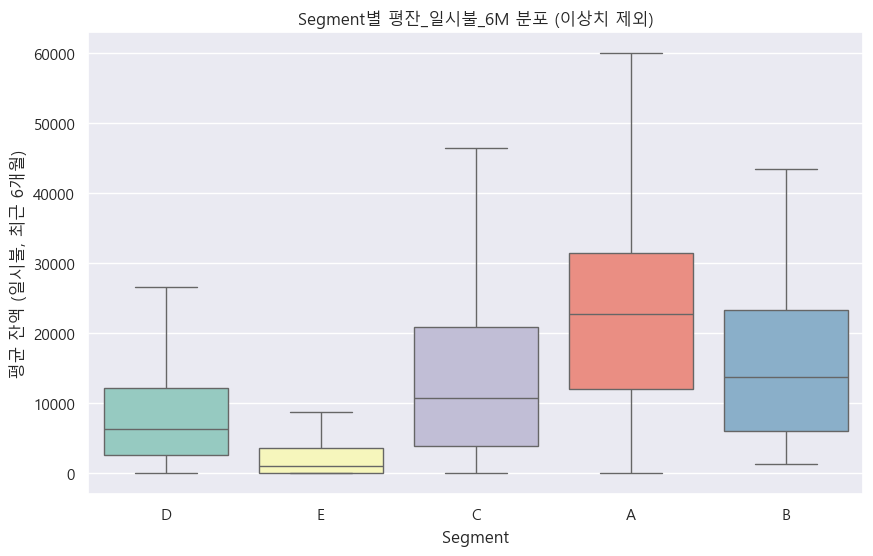

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=train_df,
    x='Segment',
    y='평잔_일시불_6M',
    palette='Set3',
    showfliers=False  # 이상치는 숨김
)
plt.title('Segment별 평잔_일시불_6M 분포 (이상치 제외)')
plt.ylabel('평균 잔액 (일시불, 최근 6개월)')
plt.show()
